## EDA on multiple regression problem statement
#### Mounting google drive into colab session

In [ ]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing the basic packages for data analysis
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# read the dataset as dataframe
df = pd.read_csv('/content/drive/MyDrive/paper_data.csv')

In [ ]:
df.describe

<bound method NDFrame.describe of       f1    f2    f3      f4     f5     f6
0    4.0  2.95  10.0   1.277  87.23  0.821
1    4.0  4.33  10.0   1.432  85.68  1.091
2    4.0  5.71  10.0   1.397  86.03  1.356
3    4.0  7.08  10.0   1.472  85.28  1.445
4    4.0  8.46  10.0   1.285  87.15  1.657
..   ...   ...   ...     ...    ...    ...
66  10.0  2.95  50.0  12.570  74.86  0.786
67  10.0  4.33  50.0  12.020  75.96  1.066
68  10.0  5.71  50.0   9.280  81.44  1.223
69  10.0  7.08  50.0   8.850  82.30  1.407
70  10.0  8.46  50.0   7.150  85.70  1.526

[71 rows x 6 columns]>

In [ ]:
# a breif on the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      60 non-null     float64
 1   f2      60 non-null     float64
 2   f3      62 non-null     float64
 3   f4      60 non-null     float64
 4   f5      60 non-null     float64
 5   f6      60 non-null     float64
dtypes: float64(6)
memory usage: 3.5 KB


In [ ]:
# dataframe looks like!
df.head(len(df))

,f1,f2,f3,f4,f5,f6
0,4.0,2.95,10.0,1.277,87.23,0.821
1,4.0,4.33,10.0,1.432,85.68,1.091
2,4.0,5.71,10.0,1.397,86.03,1.356
3,4.0,7.08,10.0,1.472,85.28,1.445
4,4.0,8.46,10.0,1.285,87.15,1.657
...,...,...,...,...,...,...
66,10.0,2.95,50.0,12.570,74.86,0.786
67,10.0,4.33,50.0,12.020,75.96,1.066
68,10.0,5.71,50.0,9.280,81.44,1.223
69,10.0,7.08,50.0,8.850,82.30,1.407


In [ ]:
# figure out missing values along axis 0
df.isna().sum(axis=0)

f1    11
f2    11
f3     9
f4    11
f5    11
f6    11
dtype: int64

In [ ]:
# figure out missing values along axis 1
df.isna().sum(axis=1)

0     0
1     0
2     0
3     0
4     0
     ..
66    0
67    0
68    0
69    0
70    0
Length: 71, dtype: int64

In [ ]:
# find the nan values in each cell
df.isna()

,f1,f2,f3,f4,f5,f6
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
66,False,False,False,False,False,False
67,False,False,False,False,False,False
68,False,False,False,False,False,False
69,False,False,False,False,False,False


In [ ]:
# remove nan values
df.dropna(inplace=True)

In [ ]:
# make sure there are no more nan values
df.isna().sum()

f1    0
f2    0
f3    0
f4    0
f5    0
f6    0
dtype: int64

Text(0.5, 0, 'Samples from dataset')

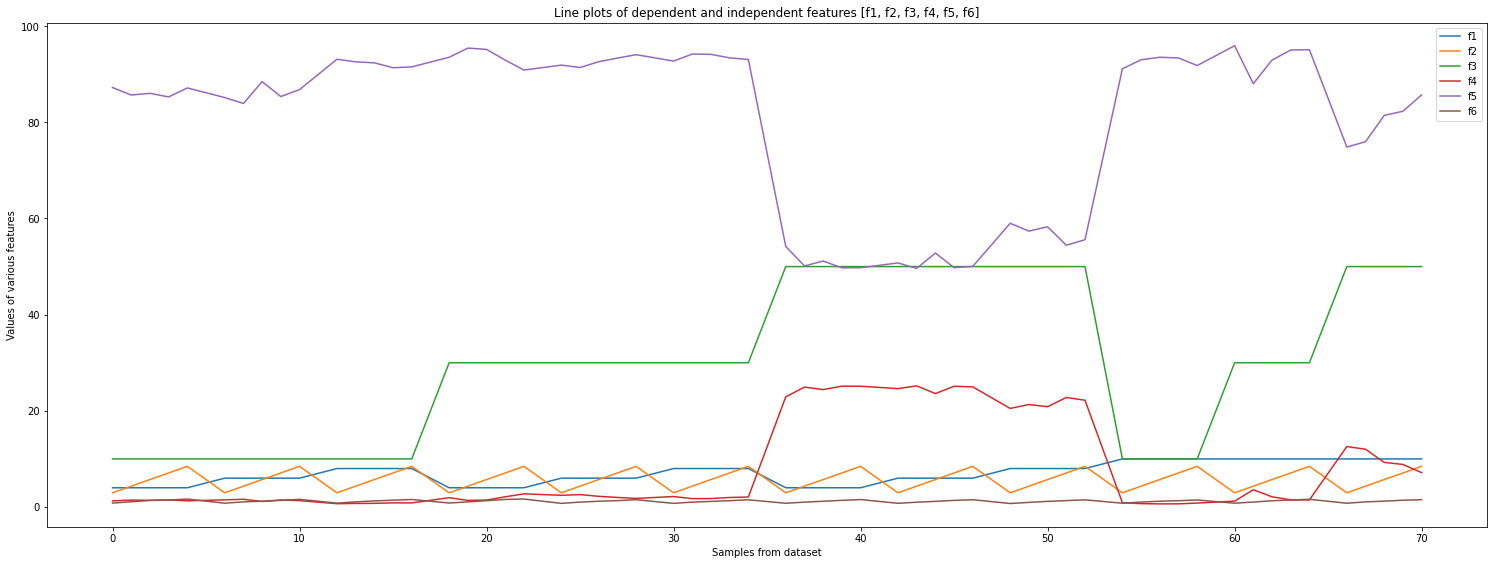

In [ ]:
# Line plots of dependent and independent features [f1, f2, f3, f4, f5, f6]
fig = plt.figure(figsize=(20,7))

ax = fig.add_axes([0,0,1,1])
ax.plot(df['f1'], label='f1')
ax.plot(df['f2'], label='f2')
ax.plot(df['f3'], label='f3')
ax.plot(df['f4'], label='f4')
ax.plot(df['f5'], label='f5')
ax.plot(df['f6'], label='f6')
ax.set_title('Line plots of dependent and independent features [f1, f2, f3, f4, f5, f6]')
ax.legend()
plt.ylabel('Values of various features')
plt.xlabel('Samples from dataset')

In [ ]:
df['f2'].corr(df['f6']) # correlation between f2 and f6

0.9753897487908832

In [ ]:
df['f4'].corr(df['f5']) # correlation between f4 and f5

-0.9836166954299285

In [ ]:
df['f3'].corr(df['f4']) # correlation between f3 and f4

0.821931643022835

In [ ]:
df['f3'].corr(df['f5']) # correlation between f3 and f5

-0.7221415749810399

In [ ]:
df.corr() # correlation on overall features

,f1,f2,f3,f4,f5,f6
f1,1.000000e+00,-1.359799e-16,1.070246e-16,-0.193895,0.264961,-0.066239
f2,-1.359799e-16,1.000000e+00,-1.861981e-17,-0.006374,0.009132,0.975390
f3,1.070246e-16,-1.861981e-17,1.000000e+00,0.821932,-0.722142,-0.063417
f4,-1.938948e-01,-6.373778e-03,8.219316e-01,1.000000,-0.983617,-0.077865
f5,2.649610e-01,9.132256e-03,-7.221416e-01,-0.983617,1.000000,0.073417
f6,-6.623942e-02,9.753897e-01,-6.341710e-02,-0.077865,0.073417,1.000000


[Text(0.5, 1.0, 'Correlation heat map for independent and dependent features of the dataset')]

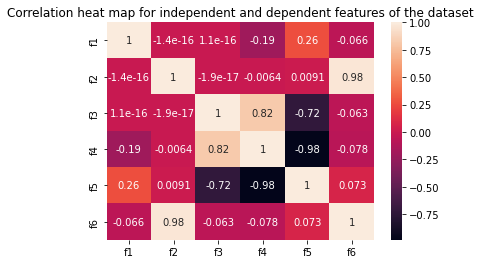

In [ ]:
sns.heatmap(df.corr(), annot = True).set(title='Correlation heat map for independent and dependent features of the dataset')

##### Conclusion:
1. Features in dataset are ['f1', 'f2', 'f3', 'f4', 'f5', 'f6'] correlated but the relation is limited and are as following
* F2, F6,
* F3, F4,
* F4, F5,
* F3, F4


##### Further analysis on focussed features

In [ ]:
pd.crosstab(df['f1'], [df['f5'], df['f6']]) # crosstab between f1 and dependent variables f5, f6

f5,49.620,49.740,49.760,49.780,50.040,50.120,50.760,51.160,52.820,54.180,...,93.530,93.533,94.067,94.133,94.200,95.033,95.100,95.167,95.433,95.933
f6,1.000,1.379,1.551,1.374,1.517,1.008,0.772,1.204,1.176,0.778,...,1.204,0.832,1.516,1.163,1.016,1.456,1.602,1.312,1.064,0.793
f1,,,,,,,,,,,,,,,,,,,,,
4.0,0,1,1,0,0,1,0,1,0,1,...,0,1,0,0,0,0,0,1,1,0
6.0,1,0,0,1,1,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
8.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
10.0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,1


[Text(0.5, 1.0, 'Crosstab correlation between the features of the dataset')]

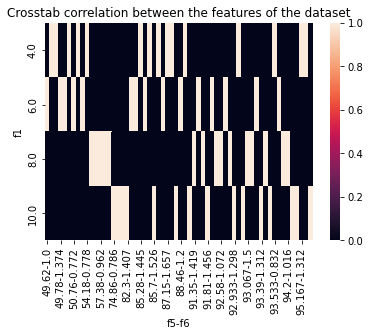

In [ ]:
sns.heatmap(pd.crosstab(df['f1'], [df['f5'], df['f6']])).set(title='Crosstab correlation between the features of the dataset')

##### This concludes that there is no direct correlation between the feature f1 (treated as class type) and the dependent features f5 and f6.

Text(0.5, 1.01, 'Pair plot between all the features of the dataset')

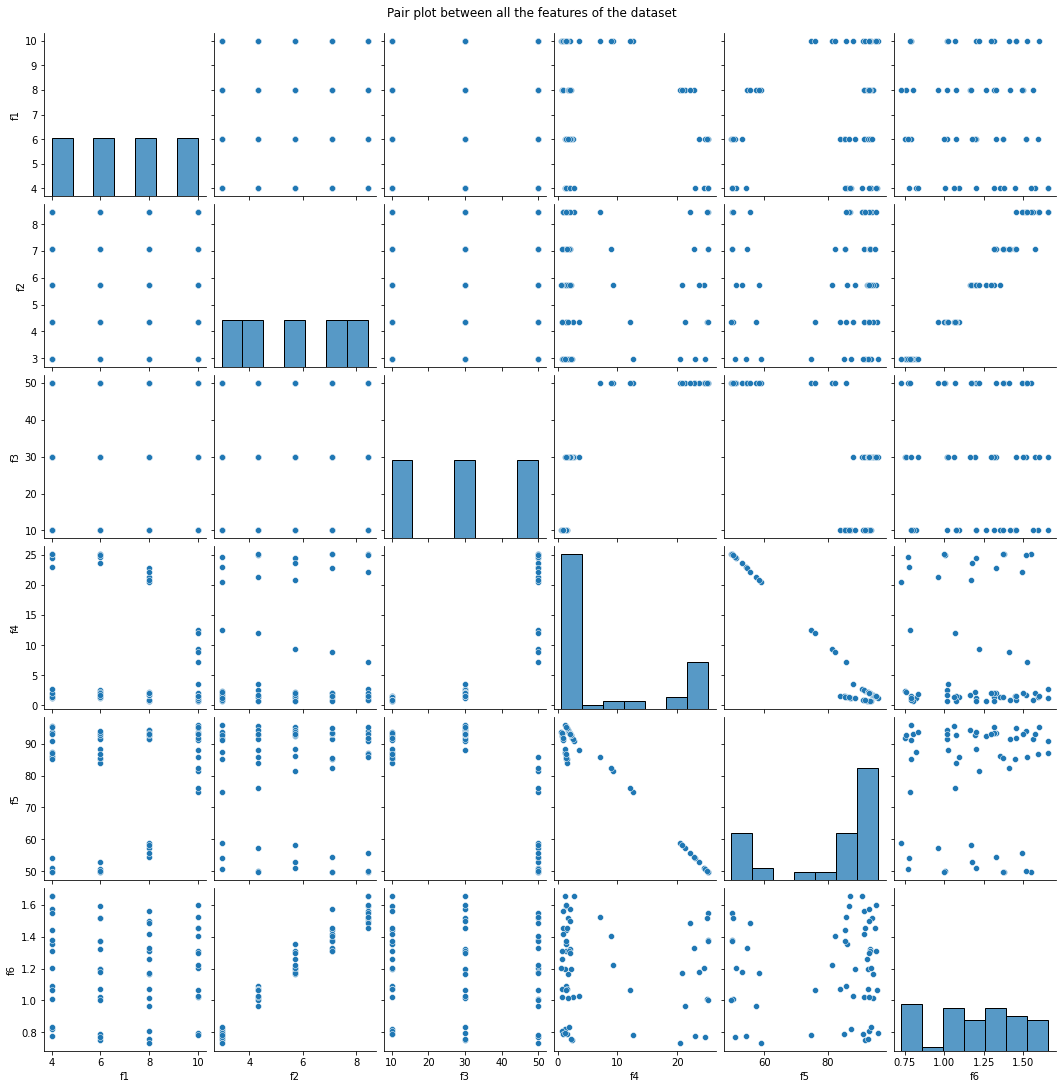

In [ ]:
# Pair plot between all the features of the dataset
ax = sns.pairplot(df)
ax.fig.suptitle('Pair plot between all the features of the dataset', y=1.01)

##### Joint plots on various correlated features of the dataset, extracted from the correlation heatmap;

0.9753897487908832


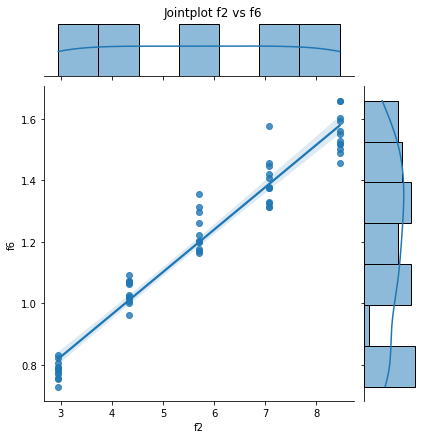

In [ ]:
# Jointplot f2 vs f6
ax = sns.jointplot(x=df['f2'], y=df['f6'], kind='reg')
ax.fig.suptitle('Jointplot f2 vs f6', y=1.01)
print(df['f2'].corr(df['f6']))

-0.9836166954299285


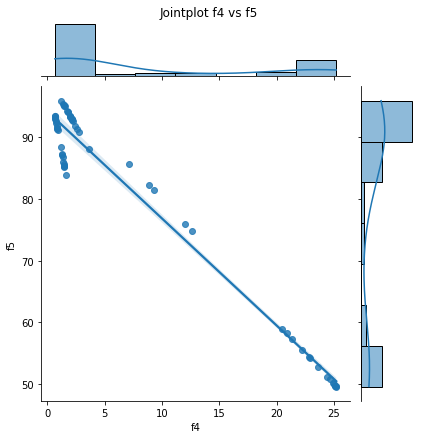

In [ ]:
# Jointplot f4 vs f5
ax = sns.jointplot(x=df['f4'], y=df['f5'], kind='reg')
ax.fig.suptitle('Jointplot f4 vs f5', y=1.01)
print(df['f4'].corr(df['f5']))

0.821931643022835


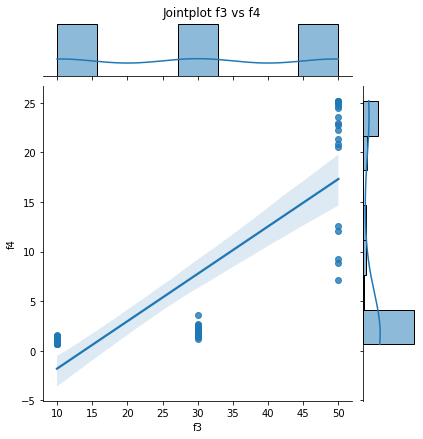

In [ ]:
# Jointplot f3 vs f4
ax = sns.jointplot(x=df['f3'], y=df['f4'], kind='reg')
ax.fig.suptitle('Jointplot f3 vs f4', y=1.01)
print(df['f3'].corr(df['f4']))

-0.7221415749810399


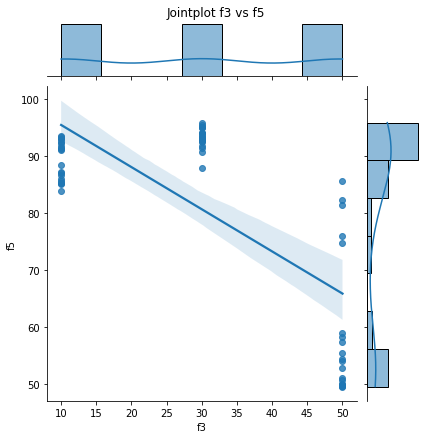

In [ ]:
# Jointplot f3 vs f5
ax = sns.jointplot(x=df['f3'], y=df['f5'], kind='reg')
ax.fig.suptitle('Jointplot f3 vs f5', y=1.01)
print(df['f3'].corr(df['f5']))